In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt(open('mnist_train_small.csv','rb'),delimiter=',')
label=data[:,0]
data=data[:,1:]

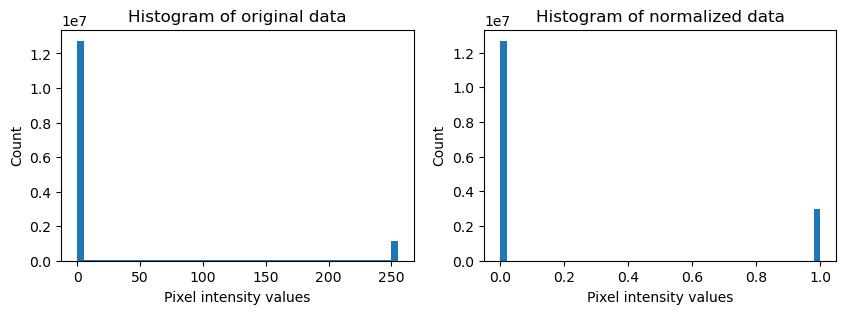

In [3]:
#data convert to binary form
dataNorm=(data>0).astype(float)

fig,ax=plt.subplots(1,2,figsize=(10,3))
ax[0].hist(data.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')

ax[1].hist(dataNorm.flatten(),50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

In [4]:
dataTen=torch.tensor(dataNorm).float()
labelTen=torch.tensor(label).long() #long is assiciate to int32 in pytorch

train_data,test_data,train_label,test_label=train_test_split(dataTen,labelTen,test_size=.1)

train_dataset=TensorDataset(train_data,train_label)
test_dataset=TensorDataset(test_data,test_label)

train_loader=DataLoader(train_dataset,batch_size=16,shuffle=True,drop_last=True)
test_loader=DataLoader(test_dataset,batch_size=test_dataset.tensors[0].shape[0])

In [10]:
len(test_dataset)

2000

In [8]:
for dat,lab in train_loader:
    print(dat,lab)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([7, 0, 1, 1, 0, 3, 9, 1, 8, 2, 4, 0, 9, 5, 8, 9])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([0, 4, 7, 5, 1, 2, 5, 4, 5, 7, 1, 9, 0, 8, 2, 0])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([9, 9, 0, 3, 8, 5, 9, 3, 4, 8, 2, 9, 3, 3, 7, 2])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([4, 3, 3, 7, 8, 9, 9, 4, 5, 5, 3, 4, 7, 8, 8, 1])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([7, 9, 3, 8, 3, 0, 2, 9, 6, 8, 1, 5, 5, 3, 9, 4])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([7, 6, 6, 9, 9, 4, 9, 6, 4, 8, 8, 6, 7, 9, 1, 0])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 

In [7]:
dat,lab=next(iter(test_loader))
print(dat,lab)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([6, 6, 4,  ..., 3, 9, 6])


In [13]:
def create_mnist_ann(): 
    
    class neural_network_mnist(nn.Module):
        def __init__(self):
            super().__init__()
            
            self.input=nn.Linear(784,64)
            
            self.fc1=nn.Linear(64,48)
            self.fc2=nn.Linear(48,32)
            
            self.output=nn.Linear(32,10)
            
        def forward(self,x):
            x=F.relu(self.input(x))
            
            x=F.relu(self.fc1(x))
            x=F.relu(self.fc2(x))
            
            x=torch.log_softmax(self.output(x),axis=1)
            
            return x
        
    #create model 
    ann=neural_network_mnist()
    #loss function
    lossfun=nn.NLLLoss()
    #optimizer
    optimizer=torch.optim.SGD(ann.parameters(),lr=0.1)
    
    return ann,lossfun,optimizer

In [16]:
def trainModel(Numepoch):
    trainAcc=[]
    testAcc=[]
    losses=torch.zeros(Numepoch)
    
    ann,lossfun,optimizer=create_mnist_ann()
    
    for epoch in range(Numepoch):
        ann.train()
        
        batchAcc=[]
        batchloss=[]
        for dat,lab in train_loader:
            yHat=ann(dat)
            loss=lossfun(yHat,lab)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            match=(torch.argmax(yHat,axis=1)==lab).float()
            batchAcc.append(100*torch.mean(match).item())
            
            batchloss.append(loss.item())
        
        trainAcc.append(np.mean(batchAcc))
        losses[epoch]=np.mean(batchloss)
        
        ann.eval()
        dat,lab=next(iter(test_loader))
        with torch.no_grad():
            yHat=ann(dat)
        testAcc.append( 100*torch.mean( (torch.argmax(yHat,axis=1)==lab).float()) )
    return ann,trainAcc,testAcc,losses

In [17]:
ann,trainAcc,testAcc,losses=trainModel(50)

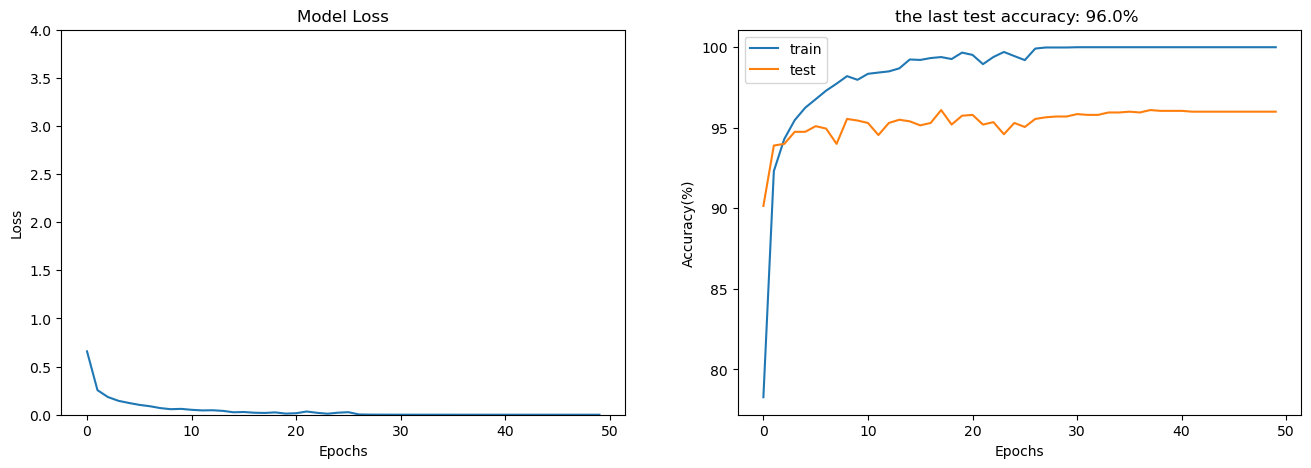

In [27]:
fig,ax=plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,4])
ax[0].set_title('Model Loss')

ax[1].plot(trainAcc,label='train')
ax[1].plot(testAcc,label='test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy(%)')
ax[1].legend()
ax[1].set_title(f'the last test accuracy: {testAcc[-1]}% ')

plt.show()

inspect the results in detail

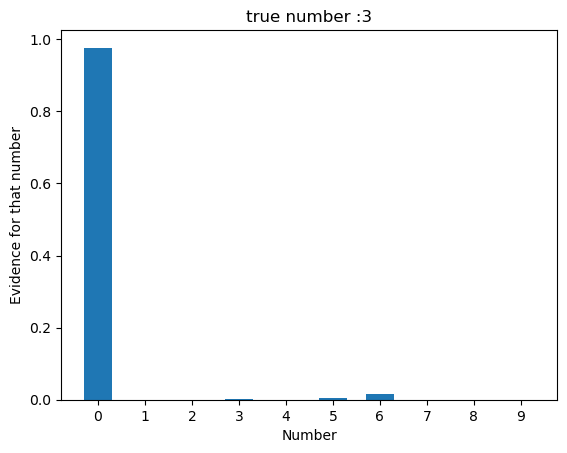

In [68]:
dat,lab=next(iter(test_loader))
prediction=ann(dat).detach()
sample=692
plt.bar(range(10),np.exp(prediction[sample]),0.6)
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title(f'true number :{lab[sample]}')
plt.show()

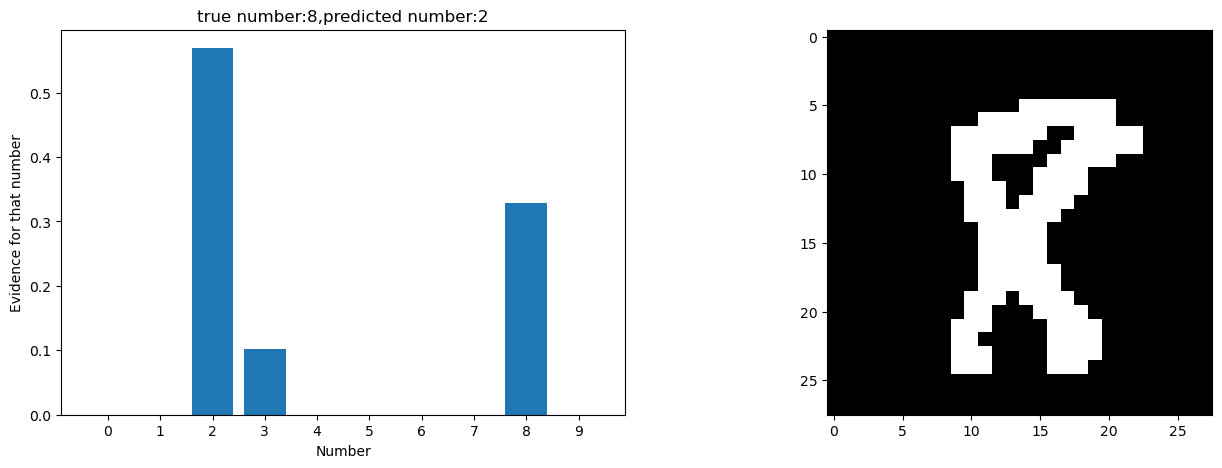

In [69]:
error=np.where(torch.max(prediction,axis=1)[1]!=lab)[0]

sample=5
fig,ax=plt.subplots(1,2,figsize=(16,5))
ax[0].bar(range(10),np.exp(prediction[error[sample]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')

predictedNum=torch.argmax(prediction[error[sample]])
ax[0].set_title(f'true number:{lab[error[sample]]},predicted number:{predictedNum}')

ax[1].imshow( np.reshape(dat[error[sample],:],(28,28)) ,cmap='gray')

plt.show()